**<h1 align="center"> #1 Prediction using Supervised ML </h1>**

Regression analysis is a set of statistical methods used for the estimation of relationships between a dependent variable and one or more independent variables. It can be utilized to assess the strength of the relationship between variables and for modeling the future relationship between them.

### Task 0: Import the packages and classes that are needed & Provide the data to work with
---

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline

Load the Data :

In [2]:
data = pd.read_csv("./data/student_scores - student_scores.csv")

Understand the Data :

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Task 1: Visualize the Data
---

Before starting on any task, it is often useful to understand the data by visualizing it.
For this dataset, we can use a scatter plot using Seaborn to visualize the data, since it has only two variables: the Scores and Hours.


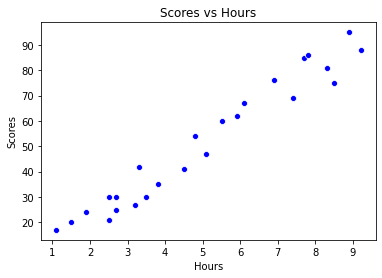

In [5]:
ax = sns.scatterplot(x = "Hours", y = "Scores", data = data, color = "blue")
ax.set_title("Scores vs Hours");

**There is a positive linear relation between the number of hours studied and percentage of score.**

### Task 2: Create a regression model and fit it with our data
---

Preparing the data by creating the x and y axis :

In [6]:
X = data.Hours.values.reshape(-1, 1)
Y = data.Scores.values

Now that we have our x and y axis, the next step is to split this data into training and testing subsets. By using Scikit-Learn's built-in train_test_split() method:

In [7]:
# Split the data into training and testing subsets
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                        random_state=0) 


Training the Algorithm :

Now is the time to train our algorithm.

In [8]:
from sklearn.linear_model import LinearRegression  

print("Creating linear regression object...")
# Create linear regression object
regressor = LinearRegression()  

print("Training the model...")
# Train the model using the training subsets
regressor.fit(X_train, Y_train) 

print("Training complete !")

Creating linear regression object...
Training the model...
Training complete !


Plotting the original scatter plot and the regression line :

Scores = 9.91*Hours + 2.02


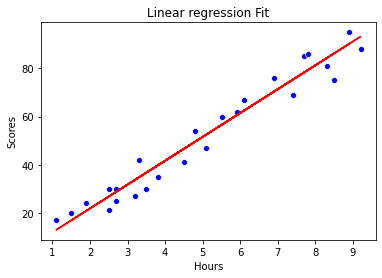

In [9]:
# Plotting the original scatter plot 
sns.scatterplot(x = "Hours", y = "Scores", data = data, color = "blue")

# The regression line : new Y
Y_value = regressor.coef_*X + regressor.intercept_

print("Scores = %.2f*Hours +" % regressor.coef_, "%.2f" %regressor.intercept_)
# Draw the line of linear regression
plt.plot(X, Y_value, 'r');

plt.title("Linear regression Fit");

### **Task 3: Make predictions using the testing set**
Now that we have trained our algorithm, it's time to make some predictions.

In [10]:
# Make predictions using the testing set
Y_pred = regressor.predict(X_test)

Comparing Actual vs Predicted :

In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


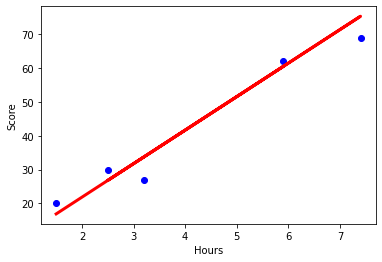

In [12]:
# Plot outputs
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, Y_pred, color='red', linewidth=3) 
plt.xlabel('Hours')  
plt.ylabel('Score') 
ax.set_title("Scores vs Hours");

What will be predicted score if a student studies for 9.25 hrs/ day?

In [13]:
Hours = np.array([[9.25]])
own_pred = regressor.predict(Hours)
print("No of study Hours = %.2f" % Hours[0][0])
print("Predicted Score = %.2f" % own_pred[0])

No of study Hours = 9.25
Predicted Score = 93.69


### **Task 4: Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred))

# The mean absolute Error
print('Mean Absolute Error: %.2f' % mean_absolute_error(Y_test, Y_pred)) 

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 21.60
Mean Absolute Error: 4.18
Coefficient of determination: 0.95
